In [996]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib

In [997]:
dataset = pd.read_csv(r'C:\Projects_ciência_dados\regression_car_price\data\interim\dataset_interim.csv')

In [998]:
dataset

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo
0,0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,30.0,False
1,1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,3.0,False
2,2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,NaN,3.0,False
3,3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,35.0,False
4,4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,4001,Volkswagen,Routan SE,2011,194000.0,Gasoline,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,3500.0,3.6,28.0,False
3545,4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705.0,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900.0,2.0,24.0,False
3546,4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.0,34.0,False
3547,4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0,3.5,45.0,False


Valores faltantes

In [999]:
dataset.isnull().sum()

Unnamed: 0            0
brand                 0
model                 0
model_year            0
milage                0
fuel_type           132
engine                0
transmission          0
ext_col               0
int_col               0
accident             92
clean_title         477
price                 0
engine_size         328
engine_cylinders     68
engine_turbo          0
dtype: int64

Substituindo valores nulos pela média de valores não nulos

In [1000]:
mean = dataset.loc[dataset['engine_size'] > 0, 'engine_size'].mean()

In [1001]:
dataset.loc[dataset['engine_size'].isnull(), 'engine_size'] = mean 

In [1002]:
dataset['engine'].isnull().sum()

np.int64(0)

In [1003]:
np.unique(dataset['int_col'], return_counts=True)

(array(['AMG Black', 'Almond Beige', 'Amber', 'Anthracite', 'Ash', 'BLACK',
        'Beige', 'Black', 'Black / Graphite', 'Black / Gray',
        'Black / Saddle', 'Black / Stone Grey', 'Black Onyx',
        'Black w/Red Stitching', 'Black/Graphite', 'Black/Gun Metal',
        'Black/Saddle Brown', 'Blk', 'Blue', 'Brown', 'Camel',
        'Camel Leather', 'Canberra Beige', 'Canberra Beige/Black',
        'Cappuccino', 'Carbon Black', 'Ceramic', 'Charcoal',
        'Charcoal Black', 'Chateau', 'Chestnut', 'Classic Red', 'Cloud',
        'Cocoa / Dune', 'Dark Ash', 'Dark Galvanized', 'Dark Gray',
        'Deep Chestnut', 'Deep Cypress', 'Diesel Gray / Black', 'Ebony',
        'Ebony / Ebony Accents', 'Ebony / Pimento', 'Ebony Black',
        'Ebony.', 'Ebony/Light Oyster Stitch', 'Espresso', 'Gideon',
        'Global Black', 'Gold', 'Graphite', 'Graphite w/Gun Metal', 'Gray',
        'Gray w/Blue Bolsters', 'Graystone', 'Green', 'Ice',
        'Ivory / Ebony', 'Jet Black', 'Light Gray',


In [1004]:
np.unique(dataset['ext_col'], return_counts=True)

(array(['Agate Black Metallic', 'Alfa White', 'Alpine White', 'Alta White',
        'Anodized Blue Metallic', 'Anthracite Blue Metallic',
        'Antimatter Blue Metallic', 'Apex Blue', 'Arctic Gray Metallic',
        'Atomic Silver', 'Aurora Black', 'BLACK', 'Barcelona Red', 'Beige',
        'Billet Clearcoat Metallic', 'Billet Silver Metallic Clearcoat',
        'Black', 'Black Cherry', 'Black Clearcoat', 'Black Forest Green',
        'Black Noir Pearl', 'Black Obsidian', 'Black Sapphire Metallic',
        'Blu', 'Blue', 'Blue Reflex Mica', 'Blueprint',
        'Bright White Clearcoat', 'Brilliant Black',
        'Brilliant Silver Metallic', 'Bronze Dune Metallic', 'Brown',
        'Burnished Bronze Metallic', 'Cajun Red Tintcoat',
        'Carbon Black Metallic', 'Carbonized Gray Metallic',
        'Carpathian Grey Premium Metallic', 'Carrara White Metallic',
        'Caspian Blue', 'Caviar', 'Cayenne Red Tintcoat', 'Chronos Gray',
        'Chronos Gray Metallic', 'Cirrus Silver Me

Simplificando as cores

In [1005]:
def simplificando_cor(cor):
    
    cor = cor.lower()
    
    if 'black' in cor or 'ebony' in cor:
        return 'black'
    if 'white' in cor or 'ivory' in cor:
        return 'white'
    if 'gray' in cor or 'grey' in cor or 'charcoal' in cor or 'graphite' in cor:
        return 'gray'
    if 'silver' in cor:
        return 'silver'
    if 'red' in cor or 'rosso' in cor:
        return 'red'
    if 'yellow' in cor or 'giallo' in cor:
        return 'yellow'
    if 'blue' in cor:
        return 'blue'
    if 'orange' in cor or 'arancio' in cor:
        return 'orange'
    if 'beige' in cor or 'tan' in cor or 'carmel' in cor:
        return 'beige'
    if 'green' in cor:
        return 'green'
    return 'Other'

In [1006]:
dataset['color_simplified_ext'] = dataset['ext_col'].apply(simplificando_cor)

In [1007]:
dataset['color_simplified_int'] = dataset['int_col'].apply(simplificando_cor)

In [1008]:
dataset['Metallic'] = dataset['ext_col'].str.contains('Metallic', case=False)

In [1009]:
dataset

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo,color_simplified_ext,color_simplified_int,Metallic
0,0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.700000,30.0,False,black,black,False
1,1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.800000,3.0,False,Other,gray,False
2,2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.627197,3.0,False,blue,black,False
3,3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.500000,35.0,False,black,black,False
4,4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.000000,2.0,True,white,black,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,4001,Volkswagen,Routan SE,2011,194000.0,Gasoline,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,3500.0,3.600000,28.0,False,black,gray,False
3545,4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705.0,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900.0,2.000000,24.0,False,black,black,False
3546,4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.000000,34.0,False,black,black,False
3547,4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0,3.500000,45.0,False,blue,black,False


In [1010]:
dataset.isnull().sum()

Unnamed: 0                0
brand                     0
model                     0
model_year                0
milage                    0
fuel_type               132
engine                    0
transmission              0
ext_col                   0
int_col                   0
accident                 92
clean_title             477
price                     0
engine_size               0
engine_cylinders         68
engine_turbo              0
color_simplified_ext      0
color_simplified_int      0
Metallic                  0
dtype: int64

In [1011]:
dataset.shape

(3549, 19)

In [1012]:
(2617/4009) *100

65.27812422050387

Substituindo valores nulos de fuel type por valores da moda dos valores não nulos

In [1013]:
moda_fuel_type = dataset['fuel_type'].dropna().mode()[0]
moda_fuel_type

'Gasoline'

In [1014]:
dataset.loc[dataset['fuel_type'].isnull(), 'fuel_type'] = moda_fuel_type

In [1015]:
dataset['fuel_type'].isnull().sum()

np.int64(0)

Substituindo valores nulos de accident por valores da moda dos valores não nulos

In [1016]:
moda_accident = dataset['accident'].dropna().mode()[0]
moda_accident

'None reported'

In [1017]:
dataset.loc[dataset['accident'].isnull(), 'accident'] = moda_accident

In [1018]:
dataset['accident'].isnull().sum()

np.int64(0)

Substituindo valores nulos de clean title por valores da moda dos valores não nulos

In [1019]:
moda_clean_title = dataset['clean_title'].dropna().mode()[0]
moda_clean_title

'Yes'

In [1020]:
dataset.loc[dataset['clean_title'].isnull(), 'clean_title'] = moda_clean_title

In [1021]:
dataset['clean_title'].isnull().sum()

np.int64(0)

In [1022]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'engine_size', 'engine_cylinders',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic'],
      dtype='object')

Substituindo valores nulos da cor externa por valores da moda dos valores não nulos

In [1023]:
moda_cor_externa = dataset['color_simplified_ext'].dropna().mode()[0]
moda_cor_externa

'black'

In [1024]:
dataset.loc[dataset['color_simplified_ext'].isnull(), 'color_simplified_ext'] = moda_cor_externa

Substituindo valores nulos da cor externa por valores da moda dos valores não nulos

In [1025]:
moda_cor_int = dataset['color_simplified_int'].dropna().mode()[0]

In [1026]:
dataset.loc[dataset['color_simplified_int'].isnull(), 'color_simplified_int'] = moda_cor_int

In [1027]:
dataset['color_simplified_int'].isnull().sum()

np.int64(0)

In [1028]:
dataset['engine_cylinders']

0       30.0
1        3.0
2        3.0
3       35.0
4        2.0
        ... 
3544    28.0
3545    24.0
3546    34.0
3547    45.0
3548    24.0
Name: engine_cylinders, Length: 3549, dtype: float64

In [1029]:
dataset = dataset.drop('engine_cylinders', axis=1)

In [1030]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'engine_size', 'engine_turbo',
       'color_simplified_ext', 'color_simplified_int', 'Metallic'],
      dtype='object')

In [1031]:
dataset = dataset.drop(['engine', 'ext_col', 'int_col'], axis=1)

Peocurando valores inconsistentes

In [1032]:
negativas = dataset.select_dtypes(['int', 'float'])
(negativas<0).any()

Unnamed: 0     False
model_year     False
milage         False
price          False
engine_size    False
dtype: bool

Brand possui amostras raras (<10), ent irei agrupar em 'Other'

In [1033]:
np.unique(dataset['brand'], return_counts=True)

(array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford',
        'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai', 'INFINITI',
        'Jaguar', 'Jeep', 'Karma', 'Kia', 'Land', 'Lexus', 'Lincoln',
        'Lotus', 'MINI', 'Maserati', 'Maybach', 'Mazda', 'Mercedes-Benz',
        'Mercury', 'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar',
        'Pontiac', 'Porsche', 'RAM', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object),
 array([ 62,  17,   4, 182, 330,   9,  30,  88, 266,  28,  86,   5, 366,
         84,  20,  63,  16,  72,  58,  47, 140,   2,  76, 103, 150,  51,
          4,  33,  27,   1,  64, 256,   3,  20, 111,   1,   1,  15, 120,
         89,   1,   2,   5,   6,  64,   1,  81, 191,  59,  38,   1]))

In [1034]:
counts = dataset['brand'].value_counts()
rare = counts[counts < 10].index
dataset['brand'] = dataset['brand'].replace(rare, 'Other')

In [1035]:
#dataset.loc[dataset['brand'] == 'Other']

Divisão em previsoras e classe

In [1036]:
x = dataset.drop('price', axis=1)
x.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'accident', 'clean_title', 'engine_size',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic'],
      dtype='object')

In [1037]:
x = x.drop('Unnamed: 0', axis=1)

In [1038]:
x.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'accident', 'clean_title', 'engine_size', 'engine_turbo',
       'color_simplified_ext', 'color_simplified_int', 'Metallic'],
      dtype='object')

In [1039]:
y = pd.DataFrame({
    'price':dataset['price']
})
y.columns

Index(['price'], dtype='object')

In [1040]:
np.unique(dataset['transmission'], return_counts=True)

(array(['1-Speed A/T', '1-Speed Automatic', '10-Speed A/T',
        '10-Speed Automatic', '2', '4-Speed A/T', '4-Speed Automatic',
        '5-Speed A/T', '5-Speed Automatic', '5-Speed M/T', '6 Speed At/Mt',
        '6 Speed Mt', '6-Speed', '6-Speed A/T', '6-Speed Automatic',
        '6-Speed Automatic with Auto-Shift',
        '6-Speed Electronically Controlled Automatic with O',
        '6-Speed M/T', '6-Speed Manual', '7-Speed A/T',
        '7-Speed Automatic', '7-Speed Automatic with Auto-Shift',
        '7-Speed M/T', '8-SPEED AT', '8-Speed A/T', '8-Speed Automatic',
        '8-Speed Automatic with Auto-Shift', '9-Speed A/T',
        '9-Speed Automatic', 'A/T', 'Auto, 6-Spd w/CmdShft', 'Automatic',
        'Automatic CVT', 'Automatic, 10-Spd',
        'Automatic, 7-Spd S tronic Dual-Clutch', 'Automatic, 8-Spd',
        'Automatic, 9-Spd 9G-Tronic', 'CVT Transmission', 'CVT-F', 'F',
        'M/T', 'Manual', 'Manual, 6-Spd', 'SCHEDULED FOR OR IN PRODUCTION',
        'Transmission Ove

In [1041]:
def encontrando_marcha(marcha):

    if not isinstance(marcha, str):
        return "Other"

    marcha = marcha.upper()

    if "1-SPEED" in marcha: return 1
    if "1 SPEED" in marcha: return 1

    if "2-SPEED" in marcha: return 2
    if "2 SPEED" in marcha: return 2

    if "3-SPEED" in marcha: return 3
    if "3 SPEED" in marcha: return 3

    if "4-SPEED" in marcha: return 4
    if "4 SPEED" in marcha: return 4

    if "5-SPEED" in marcha or "5-SPD" in marcha: return 5
    if "5 SPEED" in marcha: return 5

    if "6-SPEED" in marcha or "6-SPD" in marcha: return 6
    if "6 SPEED" in marcha: return 6

    if "7-SPEED" in marcha or "7-SPD" in marcha: return 7
    if "7 SPEED" in marcha: return 7

    if "8-SPEED" in marcha or "8-SPD" in marcha: return 8
    if "8 SPEED" in marcha: return 8

    if "9-SPEED" in marcha or "9-SPD" in marcha: return 9
    if "9 SPEED" in marcha: return 9

    if "10-SPEED" in marcha or "10-SPD" in marcha: return 10
    if "10 SPEED" in marcha: return 10

    return "Other"


In [1042]:
def type_transmission(t):
    t = t.lower()
    
    if 'automatic' in t or 'a/t' in t:
        return 'Automatic'
    if 'cvt' in t:
        return 'CVT'
    if 'dual' in t or 'dct' in t:
        return 'DCT'
    if 'manual' in t or 'm/t' in t:
        return 'Manual'
    if 'single-speed' in t:
        return 'Single'
    return 'Other'

In [1043]:
dataset['type_transmission'] = dataset['transmission'].apply(type_transmission)

In [1044]:
dataset['type_transmission']

0       Automatic
1       Automatic
2       Automatic
3       Automatic
4       Automatic
          ...    
3544          DCT
3545    Automatic
3546          DCT
3547    Automatic
3548    Automatic
Name: type_transmission, Length: 3549, dtype: object

In [1045]:
np.unique(dataset['type_transmission'], return_counts=True)

(array(['Automatic', 'CVT', 'DCT', 'Manual', 'Other'], dtype=object),
 array([2790,   63,  335,  339,   22]))

In [1046]:
dataset['speed'] = dataset['transmission'].apply(encontrando_marcha)

In [1047]:
dataset['transmission'].head(20)

0                        6-Speed A/T
1                  8-Speed Automatic
2                          Automatic
3                        7-Speed A/T
4                  8-Speed Automatic
5                                  F
6                        6-Speed A/T
7                                A/T
8                        6-Speed A/T
9                                A/T
10                         Automatic
11                               A/T
12    Transmission w/Dual Shift Mode
13                         Automatic
14                               A/T
15                               A/T
16                       6-Speed M/T
17                       8-Speed A/T
18                       8-Speed A/T
19                               A/T
Name: transmission, dtype: object

In [1048]:
dataset['speed'].head(20)

0         6
1         8
2     Other
3         7
4         8
5     Other
6         6
7     Other
8         6
9     Other
10    Other
11    Other
12    Other
13    Other
14    Other
15    Other
16        6
17        8
18        8
19    Other
Name: speed, dtype: object

In [1049]:
dataset['is_other'] = np.where(dataset['speed'] == 'Other', 1,0)

In [1050]:
dataset['is_other']

0       0
1       0
2       1
3       0
4       0
       ..
3544    1
3545    1
3546    1
3547    1
3548    1
Name: is_other, Length: 3549, dtype: int64

In [1051]:
dataset['transmission'].str.contains('Automatic').mean()

np.float64(0.16483516483516483)

<Axes: xlabel='speed', ylabel='count'>

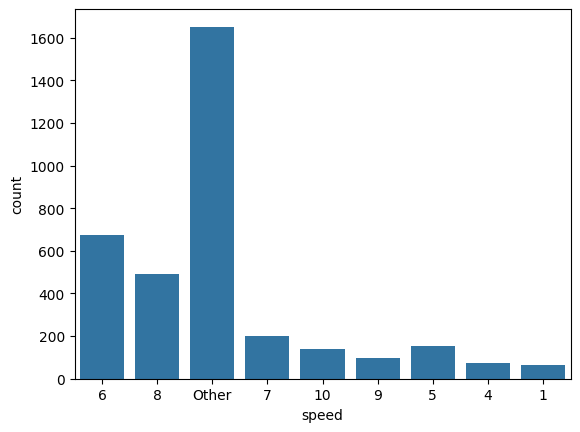

In [1052]:
sns.countplot(data=dataset, x=dataset['speed'])

In [1053]:
dataset['speed'] = (
    dataset['transmission']
    .str.extract(r'(\d)-Speed')
    #.str.extract(r'(\d)-Spd')
    .astype(float)
) 

In [1054]:
import re

In [1055]:
dataset['speed'] = (
    dataset['transmission']
    .str.extract(r'(\d+)\s*[- ]?\s*(?:Speed|Spd)', flags=re.IGNORECASE)
    .astype(float)
)


dataset['speed'] = dataset['speed'].astype(float)
dataset['speed'] = dataset['speed'].fillna("Other")


In [1056]:
dataset['speed']

0         6.0
1         8.0
2       Other
3         7.0
4         8.0
        ...  
3544    Other
3545    Other
3546    Other
3547    Other
3548    Other
Name: speed, Length: 3549, dtype: object

<Axes: xlabel='speed', ylabel='count'>

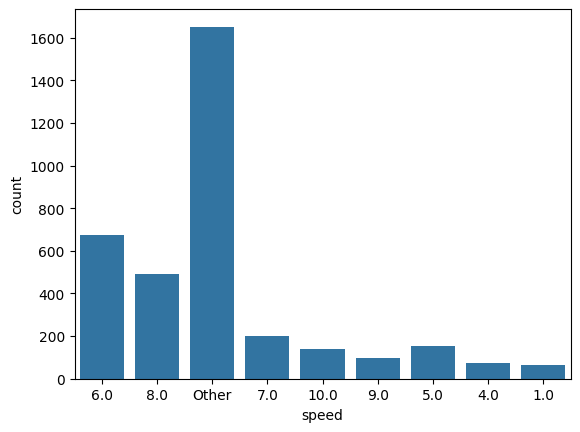

In [1057]:
sns.countplot(data=dataset, x=dataset['speed'])

In [1058]:
dataset['transmission'].unique()[:50]

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', 'Transmission w/Dual Shift Mode', '6-Speed M/T',
       '8-Speed A/T', '10-Speed A/T', '9-Speed A/T', '5-Speed A/T',
       'Automatic CVT', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '4-Speed A/T', '6-Speed Automatic', '4-Speed Automatic',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '9-Speed Automatic', '10-Speed Automatic',
       '5-Speed M/T', '1-Speed A/T', '6-Speed Manual', 'Variable',
       '1-Speed Automatic', '2', 'Automatic, 9-Spd 9G-Tronic',
       'Automatic, 8-Spd', 'Auto, 6-Spd w/CmdShft',
       'Transmission Overdrive Switch', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '6-Speed',
       'Automatic, 10-Spd', '7-Speed M/T',
       'Automatic, 7-Spd S tronic Dual-Clutch', 'Manual, 6-Spd',
       '6-Speed Electronically Controlled Automatic with O',
       '6 Speed At/Mt', 'Manu

In [1059]:
import re

def extrair_speed(x):
    if pd.isna(x):
        return "Other"

    x = str(x).upper()  

    padrao = r'(\b[1-9]|10)\s*[- ]?\s*(SPEED|SPD|SP)?\b'

    m = re.search(padrao, x)
    if m:
        return int(m.group(1))
    return "Other"

dataset['speed'] = dataset['transmission'].apply(extrair_speed)


In [1060]:
dataset['speed_num'] = pd.to_numeric(dataset['speed'], errors='coerce')

In [1061]:
dataset['speed_is_other'] = dataset['speed_num'].isna().astype(int)

In [1062]:
dataset['speed_num'] = dataset['speed_num'].fillna(dataset['speed_num'].median())

<Axes: xlabel='speed', ylabel='count'>

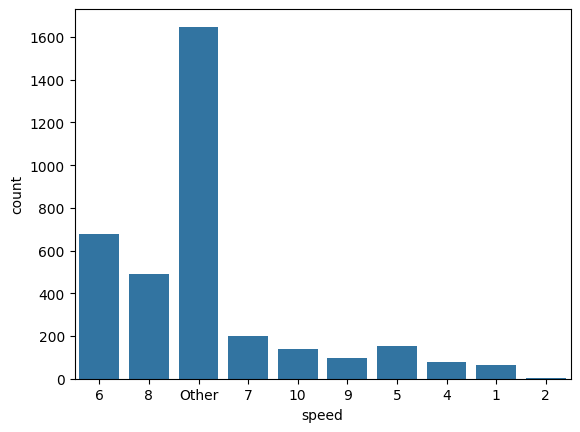

In [1063]:
sns.countplot(data=dataset, x=dataset['speed'])

In [1064]:
dataset = dataset.drop('speed', axis=1)

In [1065]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'accident', 'clean_title', 'price', 'engine_size',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic', 'type_transmission', 'is_other', 'speed_num',
       'speed_is_other'],
      dtype='object')

In [1066]:
np.unique(dataset['type_transmission'], return_counts=True)

(array(['Automatic', 'CVT', 'DCT', 'Manual', 'Other'], dtype=object),
 array([2790,   63,  335,  339,   22]))

In [1067]:
np.unique(dataset['type_transmission'], return_counts=True)

(array(['Automatic', 'CVT', 'DCT', 'Manual', 'Other'], dtype=object),
 array([2790,   63,  335,  339,   22]))

In [1068]:
dataset = dataset.drop(['transmission', 'is_other'], axis=1)

In [1069]:
x = dataset.drop(['price', 'Unnamed: 0'], axis=1)

In [1070]:
x.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'accident',
       'clean_title', 'engine_size', 'engine_turbo', 'color_simplified_ext',
       'color_simplified_int', 'Metallic', 'type_transmission', 'speed_num',
       'speed_is_other'],
      dtype='object')

In [1071]:
x = x.drop('speed_is_other', axis=1)

In [1072]:
x['type_transmission']

0       Automatic
1       Automatic
2       Automatic
3       Automatic
4       Automatic
          ...    
3544          DCT
3545    Automatic
3546          DCT
3547    Automatic
3548    Automatic
Name: type_transmission, Length: 3549, dtype: object

In [1073]:
np.unique(x['model'], return_counts=True)

(array(['124 Spider Abarth', '128 i', '135 i', ..., 'tC Base',
        'tC Release Series 6.0', 'xB Base'], shape=(1712,), dtype=object),
 array([1, 1, 3, ..., 1, 1, 1], shape=(1712,)))

In [1074]:
x.shape

(3549, 14)

In [1075]:
(1898/4009)*100

47.343477176353204

In [1076]:
x['speed_num']

0       6.0
1       8.0
2       6.0
3       7.0
4       8.0
       ... 
3544    6.0
3545    6.0
3546    6.0
3547    6.0
3548    6.0
Name: speed_num, Length: 3549, dtype: float64

<Axes: xlabel='speed_num', ylabel='count'>

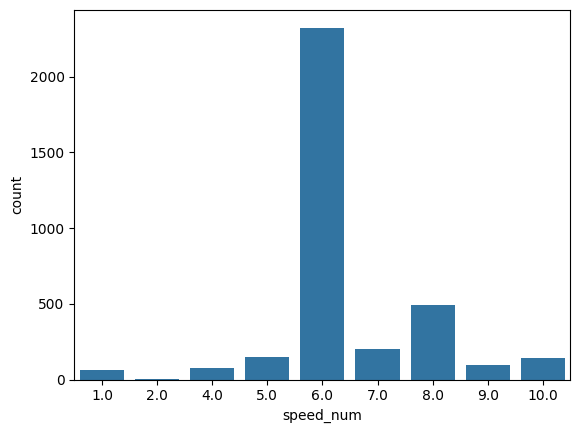

In [1077]:
sns.countplot(data=x, x='speed_num')

In [1078]:
x.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'accident',
       'clean_title', 'engine_size', 'engine_turbo', 'color_simplified_ext',
       'color_simplified_int', 'Metallic', 'type_transmission', 'speed_num'],
      dtype='object')

In [1079]:
x['engine_size'].max()

np.float64(8.3)

In [1080]:
x['engine_size'].min()

np.float64(1.0)

Divisão em treino e teste

In [1081]:
from sklearn.model_selection import train_test_split

In [1082]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

Encontrando variáveis numéricas

In [1083]:
numericas = x_train.select_dtypes(include=['int', 'float']).columns.to_list()
numericas

['model_year', 'milage', 'engine_size', 'speed_num']

Encontrando variáveis categóricas

In [1084]:
categoricas = x_train.select_dtypes(include=['object']).columns.to_list()
categoricas

['brand',
 'model',
 'fuel_type',
 'accident',
 'clean_title',
 'color_simplified_ext',
 'color_simplified_int',
 'type_transmission']

In [1085]:
for col in categoricas:
    print(col, x_train[col].map(type).unique())


brand [<class 'str'>]
model [<class 'str'>]
fuel_type [<class 'str'>]
accident [<class 'str'>]
clean_title [<class 'str'>]
color_simplified_ext [<class 'str'>]
color_simplified_int [<class 'str'>]
type_transmission [<class 'str'>]


In [1086]:
x_train.isnull().sum()

brand                   0
model                   0
model_year              0
milage                  0
fuel_type               0
accident                0
clean_title             0
engine_size             0
engine_turbo            0
color_simplified_ext    0
color_simplified_int    0
Metallic                0
type_transmission       0
speed_num               0
dtype: int64

In [1087]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2661 entries, 3070 to 3427
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 2661 non-null   object 
 1   model                 2661 non-null   object 
 2   model_year            2661 non-null   int64  
 3   milage                2661 non-null   float64
 4   fuel_type             2661 non-null   object 
 5   accident              2661 non-null   object 
 6   clean_title           2661 non-null   object 
 7   engine_size           2661 non-null   float64
 8   engine_turbo          2661 non-null   bool   
 9   color_simplified_ext  2661 non-null   object 
 10  color_simplified_int  2661 non-null   object 
 11  Metallic              2661 non-null   bool   
 12  type_transmission     2661 non-null   object 
 13  speed_num             2661 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(8)
memory usage: 275.5+ KB


Aplicando Encoder e normalização

In [1088]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [1089]:
preprocessor = ColumnTransformer([
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categoricas),
    ('scaler', StandardScaler(), numericas)
])

In [1090]:
preprocessor.set_output(transform='pandas')

,transformers,"[('one_hot', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [1091]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [ ]:
from pathlib import Path

PROJECT_ROOT = Path(r'C:\Projects_ciência_dados\regression_car_price')
ARTIFACTS_DIR = PROJECT_ROOT / 'src/ml/artifacts'

joblib.dump(preprocessor, ARTIFACTS_DIR / 'preprocessor.pkl')

['C:\\Projects_ciência_dados\\regression_car_price\\src\\ml\\artifacts\\preprocessor.pkl']

In [1094]:
x_train

,one_hot__brand_Acura,one_hot__brand_Alfa,one_hot__brand_Audi,one_hot__brand_BMW,one_hot__brand_Buick,one_hot__brand_Cadillac,one_hot__brand_Chevrolet,one_hot__brand_Chrysler,one_hot__brand_Dodge,one_hot__brand_Ford,...,one_hot__color_simplified_int_yellow,one_hot__type_transmission_Automatic,one_hot__type_transmission_CVT,one_hot__type_transmission_DCT,one_hot__type_transmission_Manual,one_hot__type_transmission_Other,scaler__model_year,scaler__milage,scaler__engine_size,scaler__speed_num
3070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.159587,0.368713,-0.106263,0.451759
3341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.669829,0.494546,-1.661740,-0.283489
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.001595,-0.780775,-0.106263,1.187007
2880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.486652,0.499922,-0.032193,-0.283489
640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.159587,1.110323,0.782581,-0.283489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.491353,2.527585,0.708510,-0.283489
3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.001595,-0.962908,-0.846967,-0.283489
271,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.172179,-0.598603,-0.476615,1.187007
2522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-2.316067,1.061451,-1.069178,-1.018737


In [1095]:
from scipy.stats import trim_mean

In [1096]:
trim_mean(dataset['price'], 0.1)

np.float64(29063.304118268214)

In [1097]:
dataset['price'].median()

np.float64(28000.0)

In [1098]:
type(dataset['price'][0])

numpy.float64

In [1099]:
x_train.shape, x_test.shape

((2661, 1533), (888, 1533))

In [1100]:
x_train.to_csv('../data/processed/x_train.csv', index=False)
x_test.to_csv('../data/processed/x_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)